Import Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline

Read CSV

In [ ]:
plant1_gen = pd.read_csv('/content/Plant_1_Generation_Data.csv')
plant2_gen = pd.read_csv('/content/Plant_2_Generation_Data.csv')

In [ ]:
plant1_sens = pd.read_csv('/content/Plant_1_Weather_Sensor_Data.csv')
plant2_sens = pd.read_csv('/content/Plant_2_Weather_Sensor_Data.csv')

Data Cleaning

In [ ]:
plant1_gen

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


Groupby Day For Summation Of Yield

In [ ]:
plant1_gendaily = plant1_gen.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum').reset_index()
plant1_gendaily

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,01-06-2020 00:00,0.0,0.0,5407.250000,153519480.0
1,01-06-2020 00:15,0.0,0.0,0.000000,153519480.0
2,01-06-2020 00:30,0.0,0.0,0.000000,153519480.0
3,01-06-2020 00:45,0.0,0.0,0.000000,153519480.0
4,01-06-2020 01:00,0.0,0.0,0.000000,153519480.0
...,...,...,...,...,...
3153,31-05-2020 22:45,0.0,0.0,125291.000000,153519480.0
3154,31-05-2020 23:00,0.0,0.0,125291.000000,153519480.0
3155,31-05-2020 23:15,0.0,0.0,125291.000000,153519480.0
3156,31-05-2020 23:30,0.0,0.0,125291.000000,153519480.0


In [ ]:
plant2_gendaily = plant2_gen.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum').reset_index()
plant2_gendaily

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,0.0,0.0,48899.938095,1.418960e+10
1,2020-05-15 00:15:00,0.0,0.0,28401.000000,1.418960e+10
2,2020-05-15 00:30:00,0.0,0.0,28401.000000,1.418960e+10
3,2020-05-15 00:45:00,0.0,0.0,28401.000000,1.418960e+10
4,2020-05-15 01:00:00,0.0,0.0,26516.000000,1.418960e+10
...,...,...,...,...,...
3254,2020-06-17 22:45:00,0.0,0.0,93040.000000,1.419408e+10
3255,2020-06-17 23:00:00,0.0,0.0,93040.000000,1.419408e+10
3256,2020-06-17 23:15:00,0.0,0.0,93040.000000,1.419408e+10
3257,2020-06-17 23:30:00,0.0,0.0,93040.000000,1.419408e+10


Convert DATE_TIME into Datetime Format

In [ ]:
# Plant 1 generation data
plant1_gendaily['DATE_TIME'] = pd.to_datetime(plant1_gendaily['DATE_TIME'], format='%d-%m-%Y %H:%M', errors='coerce')
plant1_gendaily['TIME'] = plant1_gendaily['DATE_TIME'].dt.time
plant1_gendaily['DATE'] = pd.to_datetime(plant1_gendaily['DATE_TIME'].dt.date)

# Plant 2 generation data
plant2_gendaily['DATE_TIME'] = pd.to_datetime(plant2_gendaily['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
plant2_gendaily['TIME'] = plant2_gendaily['DATE_TIME'].dt.time
plant2_gendaily['DATE'] = pd.to_datetime(plant2_gendaily['DATE_TIME'].dt.date)

In [ ]:
plant1_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
plant1_gendaily.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    3158 non-null   datetime64[ns]
 1   DC_POWER     3158 non-null   float64       
 2   AC_POWER     3158 non-null   float64       
 3   DAILY_YIELD  3158 non-null   float64       
 4   TOTAL_YIELD  3158 non-null   float64       
 5   TIME         3158 non-null   object        
 6   DATE         3158 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(1)
memory usage: 172.8+ KB


Descriptive Analytics

In [ ]:
plant1_gendaily.describe()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE
count,3158,3158.000000,3158.000000,3158.000000,3.158000e+03,3158
mean,2020-06-01 06:42:44.344521728,68547.713729,6703.628149,71782.817545,1.519892e+08,2020-05-31 18:42:38.074730752
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,2.654004e+07,2020-05-15 00:00:00
25%,2020-05-23 23:18:45,0.000000,0.000000,90.750000,1.520976e+08,2020-05-23 00:00:00
50%,2020-06-01 12:37:30,8515.285714,823.033036,66068.000000,1.535320e+08,2020-06-01 00:00:00
75%,2020-06-09 17:56:15,140386.504463,13750.606696,129398.500000,1.549950e+08,2020-06-09 00:00:00
max,2020-06-17 23:45:00,298937.785710,29150.212499,193770.000000,1.561428e+08,2020-06-17 00:00:00
std,NaN,88044.612181,8603.120476,65974.417997,1.061670e+07,NaN


In [ ]:
plant2_gendaily.describe()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE
count,3259,3259.000000,3259.000000,3259.000000,3.259000e+03,3259
mean,2020-06-01 00:04:35.053697536,5124.648465,5011.974903,68443.535809,1.368802e+10,2020-05-31 12:12:35.569193216
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,2020-05-15 00:00:00
25%,2020-05-23 12:07:30,0.000000,0.000000,18698.245238,1.335913e+10,2020-05-23 00:00:00
50%,2020-06-01 00:00:00,494.427143,477.536667,73875.000000,1.419016e+10,2020-06-01 00:00:00
75%,2020-06-09 12:07:30,11048.773333,10795.727619,110975.223810,1.419312e+10,2020-06-09 00:00:00
max,2020-06-17 23:45:00,26630.506667,25979.760476,162876.000000,1.419408e+10,2020-06-17 00:00:00
std,NaN,6462.118509,6317.872611,48505.077129,1.245968e+09,NaN


Check For Missing Values

Plant 1 Generation Data


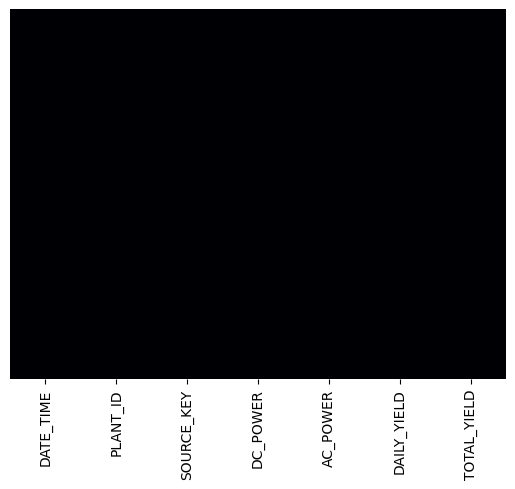

Plant 2 Generation Data


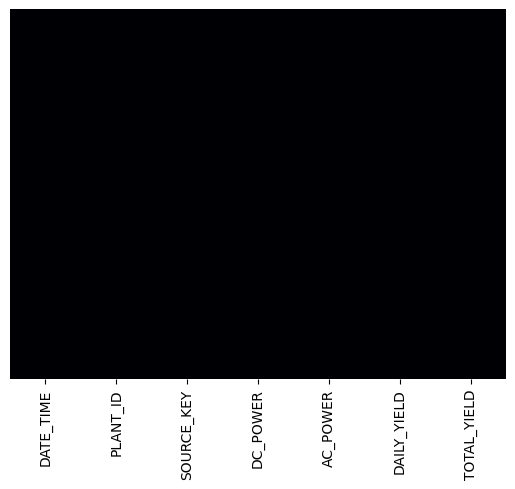

In [ ]:
print('Plant 1 Generation Data')
sbn.heatmap(plant1_gen.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()

print('Plant 2 Generation Data')
sbn.heatmap(plant2_gen.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()



*   There are no missing values. We're good to go.




Check For Faulty Inverters/Modules

In [ ]:
print('There are {} inverters in Solar Power Plant 1.'.format(plant1_gen['SOURCE_KEY'].nunique()))
print('There are {} inverters in Solar Power Plant 2.'.format(plant2_gen['SOURCE_KEY'].nunique()))

There are 22 inverters in Solar Power Plant 1.
There are 22 inverters in Solar Power Plant 2.


Plant 1 Inverters


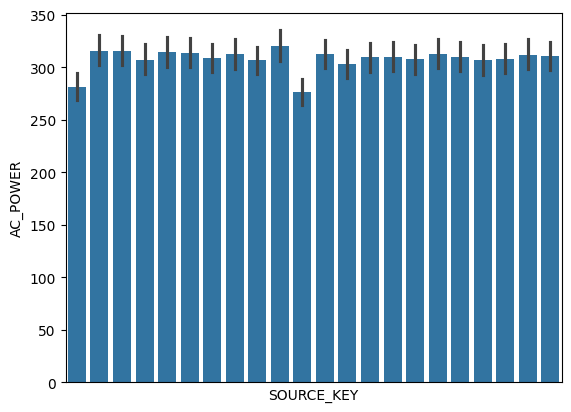

Plant 2 Inverters


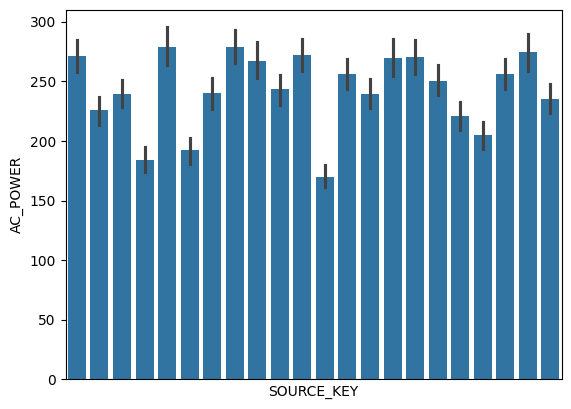

In [ ]:
print('Plant 1 Inverters')
sbn.barplot(x='SOURCE_KEY', y='AC_POWER', data=plant1_gen)
plt.xticks([])
plt.show()

print('Plant 2 Inverters')
sbn.barplot(x='SOURCE_KEY', y='AC_POWER', data=plant2_gen)
plt.xticks([])
plt.show()



*  The inverters in Plant 1 have stable outputs, while the inverters in Plant 2 have varying outputs. Assuming fully functional solar modules, this may be due to faulty inverters. Let's explore further.



**Observe Relationship Between Power Generation Data Features**

In [ ]:
plant1_gen.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

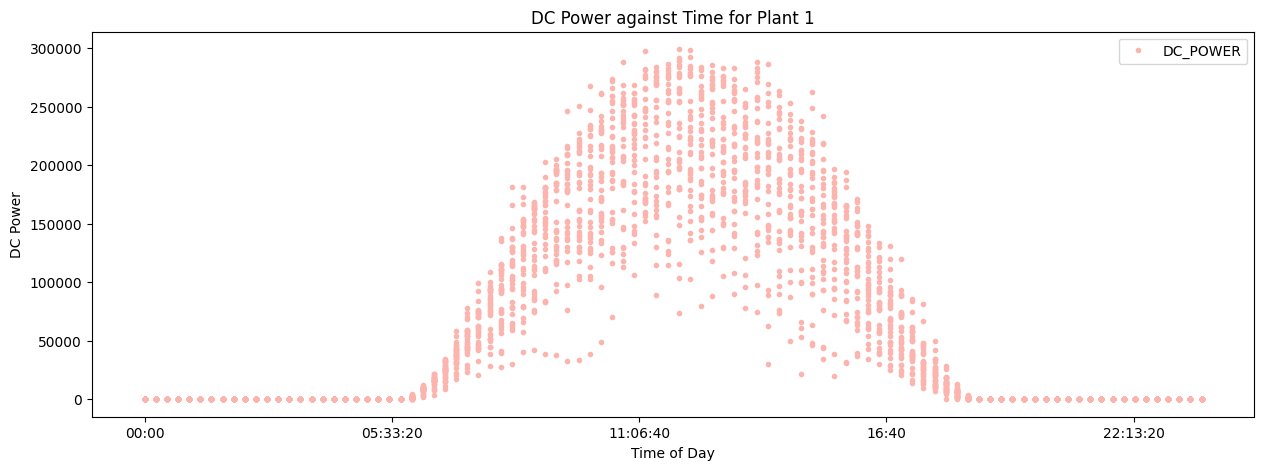

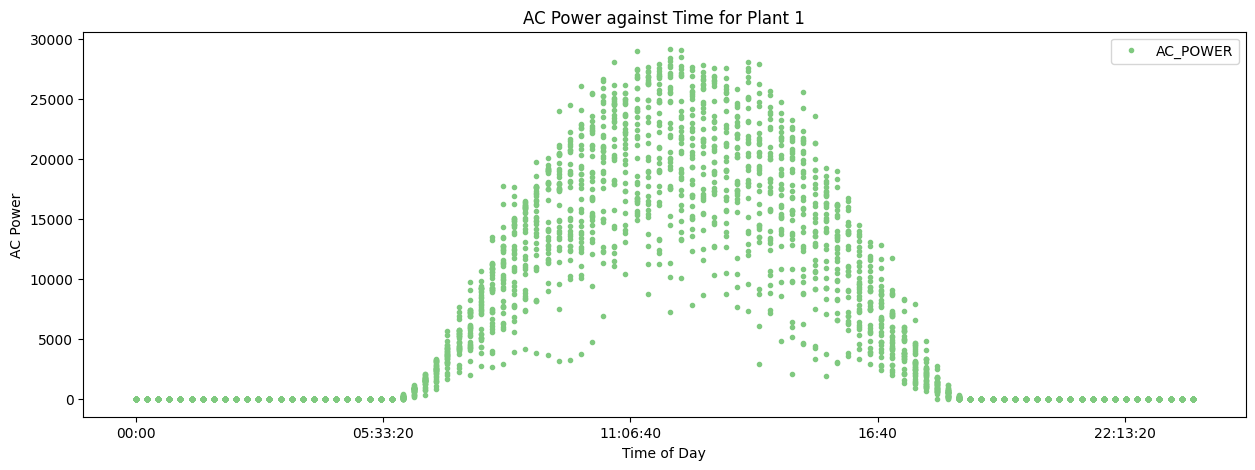

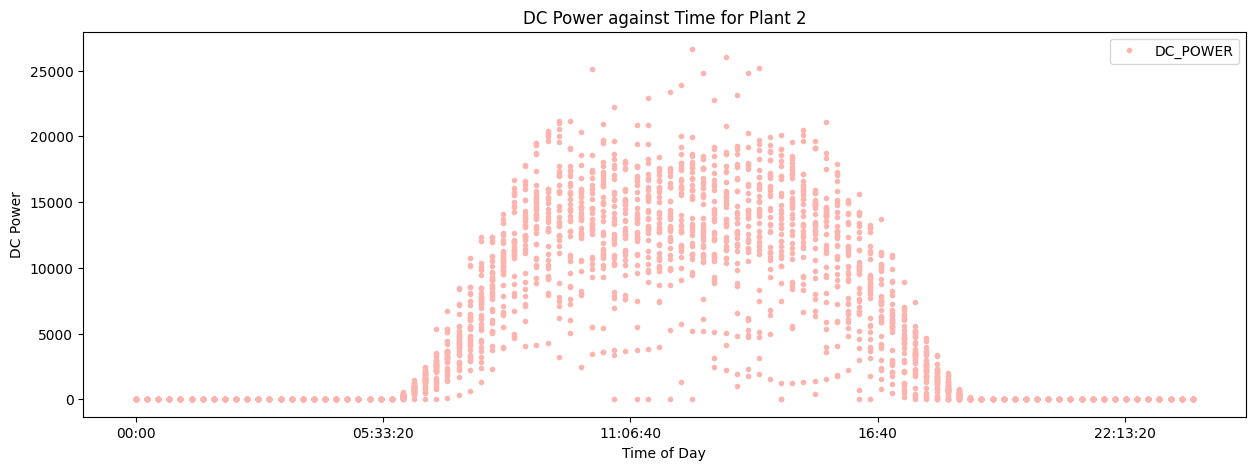

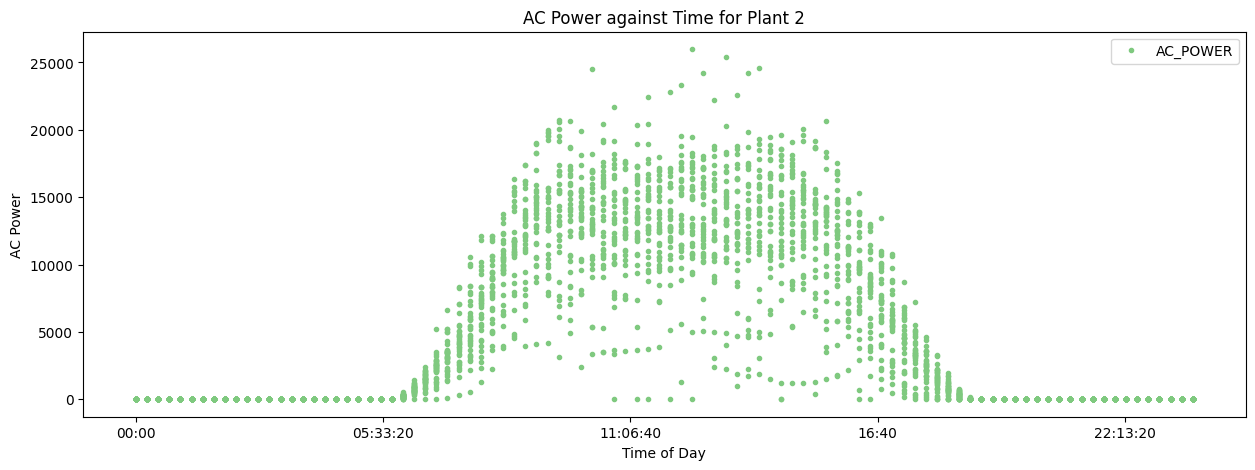

In [ ]:
plant1_gendaily.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 5), colormap='Pastel1')
plt.ylabel('DC Power')
plt.xlabel('Time of Day')
plt.title('DC Power against Time for Plant 1')
plt.show()

plant1_gendaily.plot(x= 'TIME', y='AC_POWER', style='.', figsize = (15, 5), colormap='Accent')
plt.ylabel('AC Power')
plt.xlabel('Time of Day')
plt.title('AC Power against Time for Plant 1')
plt.show()

plant2_gendaily.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 5), colormap='Pastel1')
plt.ylabel('DC Power')
plt.xlabel('Time of Day')
plt.title('DC Power against Time for Plant 2')
plt.show()

plant2_gendaily.plot(x= 'TIME', y='AC_POWER', style='.', figsize = (15, 5), colormap='Accent')
plt.ylabel('AC Power')
plt.xlabel('Time of Day')
plt.title('AC Power against Time for Plant 2')
plt.show()



*   Power output is generated with the presence of sunlight, which starts at around 0540hrs and ends at around 1800hrs. "Presence of sunlight" is dictated by the intensity of sunlight and the wavelength of sunlight that hits the PV cells. This means that even though there may still be sunlight at 1800hrs, they are diffused sunlight and scattered sunlight that do not have adequate range of wavelength for power generation.
*   Plant 2 exhibits more scattered AC and DC Power values. Inverters may not be faulty but instead the modules are.



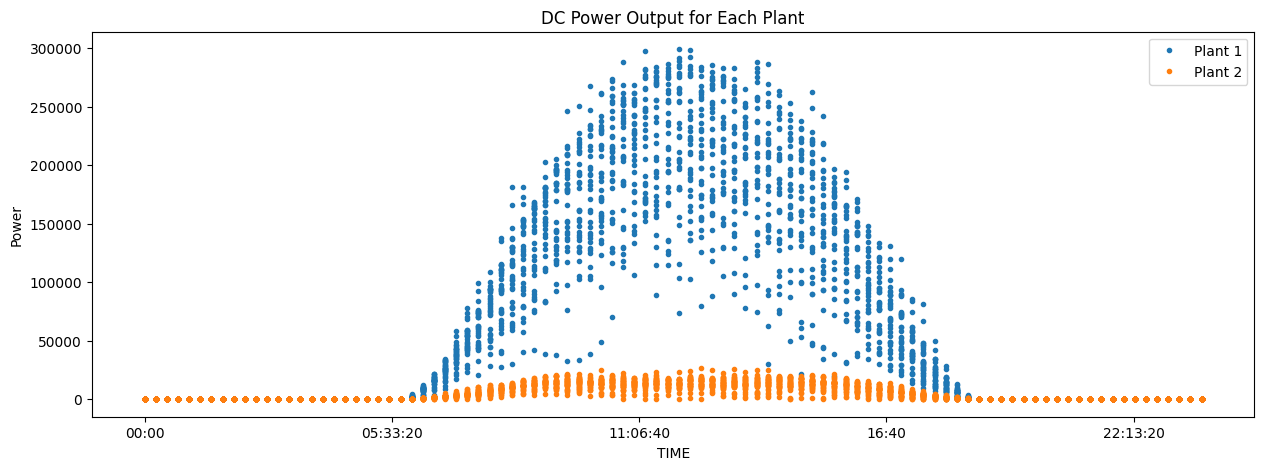

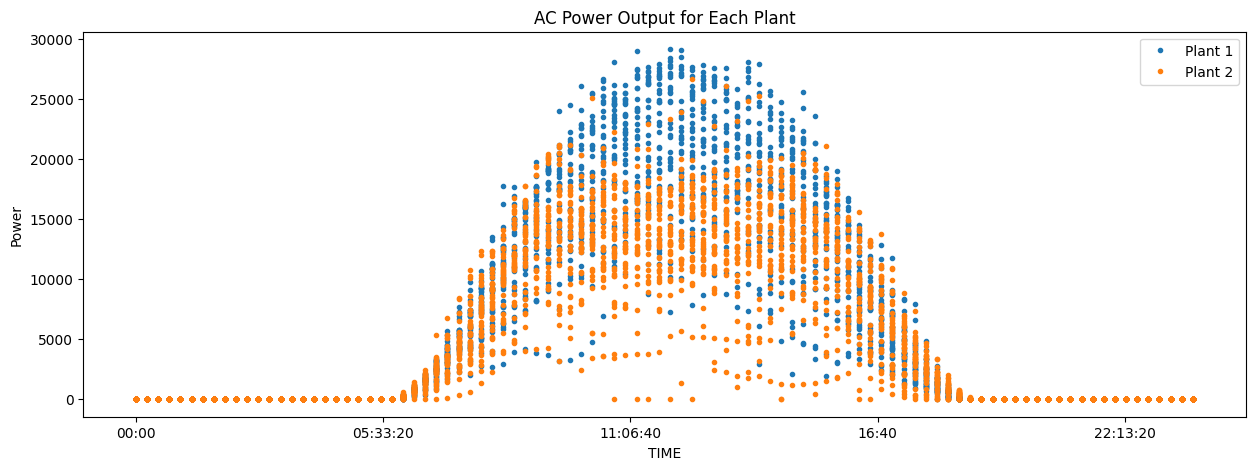

In [ ]:
# DC output from solar module
DCcompare = plant1_gendaily.plot(x='TIME', y='DC_POWER', figsize=(15,5), legend=True, style='.', label='Plant 1')
plant2_gendaily.plot(x='TIME', y='DC_POWER', legend=True, style='.', label='Plant 2', ax=DCcompare)
plt.title('DC Power Output for Each Plant')
plt.ylabel('Power')
plt.show()

# AC output from inverter
ACcompare = plant1_gendaily.plot(x='TIME', y='AC_POWER', figsize=(15,5), legend=True, style='.', label='Plant 1')
plant2_gendaily.plot(x='TIME', y='DC_POWER', legend=True, style='.', label='Plant 2', ax=ACcompare)
plt.title('AC Power Output for Each Plant')
plt.ylabel('Power')
plt.show()



*   The DC power output from solar module of Plant 2 is significantly lower than Plant 1, at almost ten times lower.
*   However, the AC power outputs from both plants are at similar levels, despite the AC output from Plant 2 being more erratic.
*   Another plausible angle is that Plant 1 produces 10 ten times more DC power output.



In [ ]:
g1corr = plant1_gen.drop(['PLANT_ID','SOURCE_KEY'], axis=1).corr()
plant2_gen = plant2_gen.drop('DATE_TIME', axis=1)
g2corr = plant2_gen.drop(['PLANT_ID','SOURCE_KEY'], axis=1).corr()

print('Plant 1 Generation Data Correlation Coefficient')
print(g1corr)

print('Plant 2 Generation Data Correlation Coefficient')
print(g2corr)

Plant 1 Generation Data Correlation Coefficient
             DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD
DC_POWER     1.000000  0.999996     0.082284     0.003815
AC_POWER     0.999996  1.000000     0.082234     0.003804
DAILY_YIELD  0.082284  0.082234     1.000000     0.009867
TOTAL_YIELD  0.003815  0.003804     0.009867     1.000000
Plant 2 Generation Data Correlation Coefficient
             DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD
DC_POWER     1.000000  0.999997     0.005593     0.004528
AC_POWER     0.999997  1.000000     0.005395     0.004533
DAILY_YIELD  0.005593  0.005395     1.000000    -0.068472
TOTAL_YIELD  0.004528  0.004533    -0.068472     1.000000


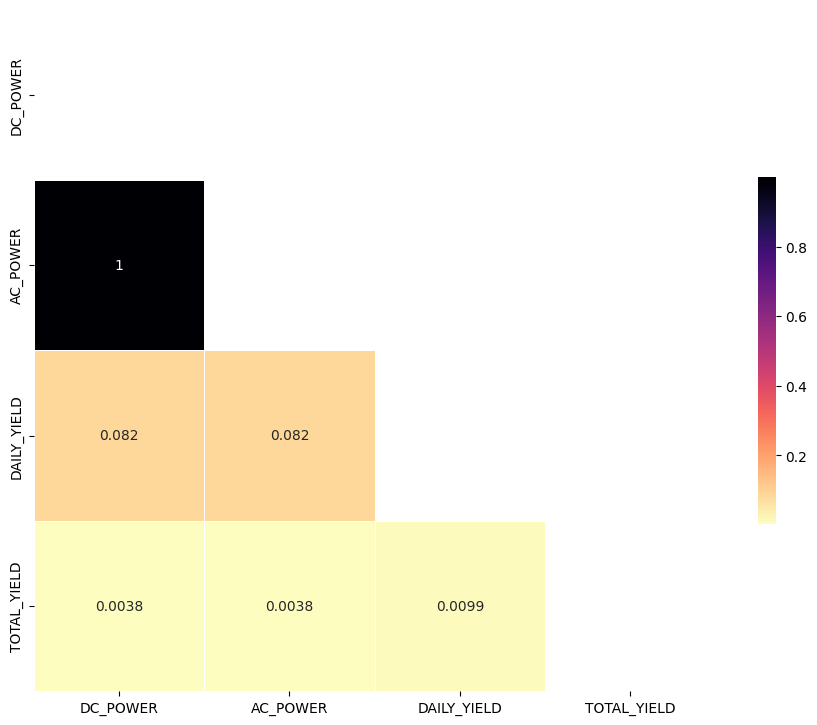

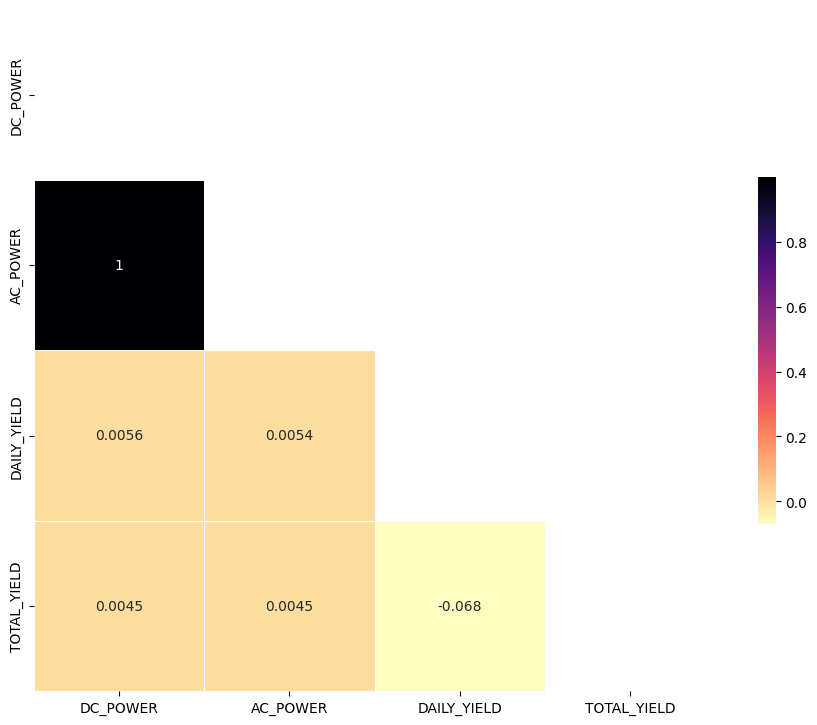

In [ ]:
g1mask = np.triu(np.ones_like(g1corr, dtype=bool))
g2mask = np.triu(np.ones_like(g2corr, dtype=bool))

cmap = 'magma_r'

f, ax = plt.subplots(figsize=(11, 9))
sbn.heatmap(g1corr, mask=g1mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

f, ax = plt.subplots(figsize=(11, 9))
sbn.heatmap(g2corr, mask=g2mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()



*   Correlation coefficient between DAILY_YIELD and output (AC_POWER and DC_POWER) for Plant 1 is higher than Plant 2.
*   Higher values mean higher correlation between the pair.
*   Looking at the correlation between AC_POWER and DC_POWER, the efficiency of the inverters can be estimated: 0.999996 for Plant 1, and 0.999997 for Plant 2.



##Observe Relationship Between Sensor Data Features

Groupby day unneeded here, but it's good to remove PLANT_ID and SOURCE_KEY while standardizing variable naming

In [ ]:
plant1_sens

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [ ]:
plant1_sensdaily = plant1_sens.groupby('DATE_TIME')[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE',
                                                     'IRRADIATION', 'SOURCE_KEY']].agg('sum').reset_index()


plant1_sensdaily

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY
0,2020-05-15 00:00:00,25.184316,22.857507,0.0,HmiyD2TTLFNqkNe
1,2020-05-15 00:15:00,25.084589,22.761668,0.0,HmiyD2TTLFNqkNe
2,2020-05-15 00:30:00,24.935753,22.592306,0.0,HmiyD2TTLFNqkNe
3,2020-05-15 00:45:00,24.846130,22.360852,0.0,HmiyD2TTLFNqkNe
4,2020-05-15 01:00:00,24.621525,22.165423,0.0,HmiyD2TTLFNqkNe
...,...,...,...,...,...
3177,2020-06-17 22:45:00,22.150570,21.480377,0.0,HmiyD2TTLFNqkNe
3178,2020-06-17 23:00:00,22.129816,21.389024,0.0,HmiyD2TTLFNqkNe
3179,2020-06-17 23:15:00,22.008275,20.709211,0.0,HmiyD2TTLFNqkNe
3180,2020-06-17 23:30:00,21.969495,20.734963,0.0,HmiyD2TTLFNqkNe


In [ ]:
plant1_sensdaily.drop('SOURCE_KEY',axis=1,inplace=True)

In [ ]:
plant1_sensdaily

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,24.621525,22.165423,0.0
...,...,...,...,...
3177,2020-06-17 22:45:00,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,21.969495,20.734963,0.0


In [ ]:
plant2_sensdaily = plant2_sens.groupby('DATE_TIME')[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE',
                                                     'IRRADIATION', 'SOURCE_KEY']].agg('sum').reset_index()

plant2_sensdaily

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY
0,2020-05-15 00:00:00,27.004764,25.060789,0.0,iq8k7ZNt4Mwm3w0
1,2020-05-15 00:15:00,26.880811,24.421869,0.0,iq8k7ZNt4Mwm3w0
2,2020-05-15 00:30:00,26.682055,24.427290,0.0,iq8k7ZNt4Mwm3w0
3,2020-05-15 00:45:00,26.500589,24.420678,0.0,iq8k7ZNt4Mwm3w0
4,2020-05-15 01:00:00,26.596148,25.088210,0.0,iq8k7ZNt4Mwm3w0
...,...,...,...,...,...
3254,2020-06-17 22:45:00,23.511703,22.856201,0.0,iq8k7ZNt4Mwm3w0
3255,2020-06-17 23:00:00,23.482282,22.744190,0.0,iq8k7ZNt4Mwm3w0
3256,2020-06-17 23:15:00,23.354743,22.492245,0.0,iq8k7ZNt4Mwm3w0
3257,2020-06-17 23:30:00,23.291048,22.373909,0.0,iq8k7ZNt4Mwm3w0


In [ ]:
plant2_sensdaily.drop('SOURCE_KEY',axis=1,inplace=True)

Convert DATE_TIME into Datetime format

In [ ]:
#Plant 1 sensor data
plant1_sensdaily['DATE_TIME'] = pd.to_datetime(plant1_sensdaily['DATE_TIME'])
plant1_sensdaily['TIME'] = plant1_sensdaily['DATE_TIME'].dt.time
plant1_sensdaily['DATE'] = pd.to_datetime(plant1_sensdaily['DATE_TIME'].dt.date)

#Plant 2 sensor data
plant2_sensdaily['DATE_TIME'] = pd.to_datetime(plant2_sensdaily['DATE_TIME'])
plant2_sensdaily['TIME'] = plant2_sensdaily['DATE_TIME'].dt.time
plant2_sensdaily['DATE'] = pd.to_datetime(plant2_sensdaily['DATE_TIME'].dt.date)

In [ ]:
plant1_sensdaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  3182 non-null   float64       
 2   MODULE_TEMPERATURE   3182 non-null   float64       
 3   IRRADIATION          3182 non-null   float64       
 4   TIME                 3182 non-null   object        
 5   DATE                 3182 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 149.3+ KB


Check For Missing Values

Plant 1 Sensor Data


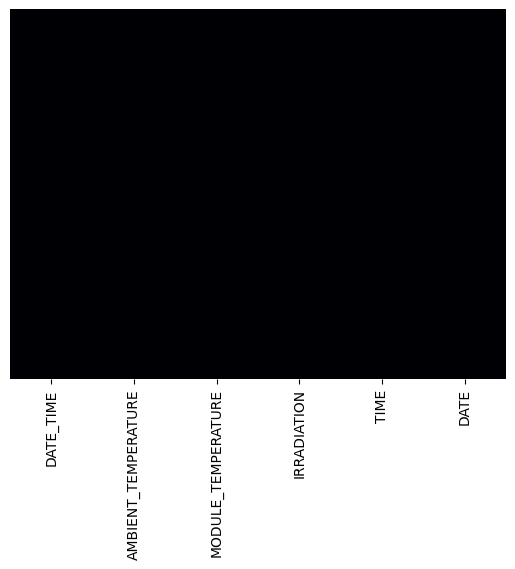

Plant 2 Sensor Data


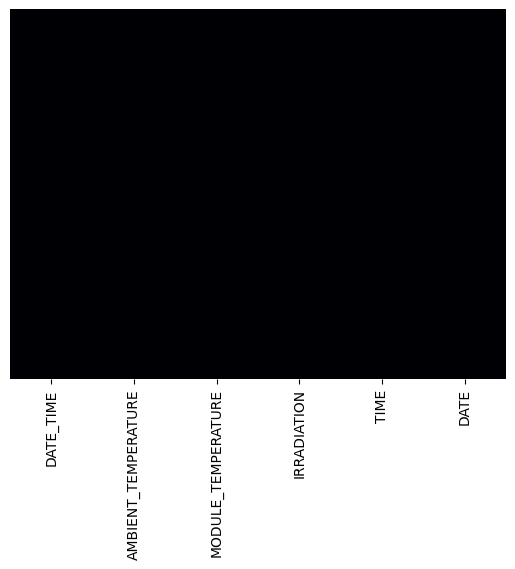

In [ ]:
print('Plant 1 Sensor Data')
sbn.heatmap(plant1_sensdaily.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()

print('Plant 2 Sensor Data')
sbn.heatmap(plant2_sensdaily.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()



*  There are no missing values.


In [ ]:
plant1_sensdaily.columns

Index(['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'TIME', 'DATE'],
      dtype='object')

In [ ]:
plant1_sensdaily['DATE'].nunique()

34

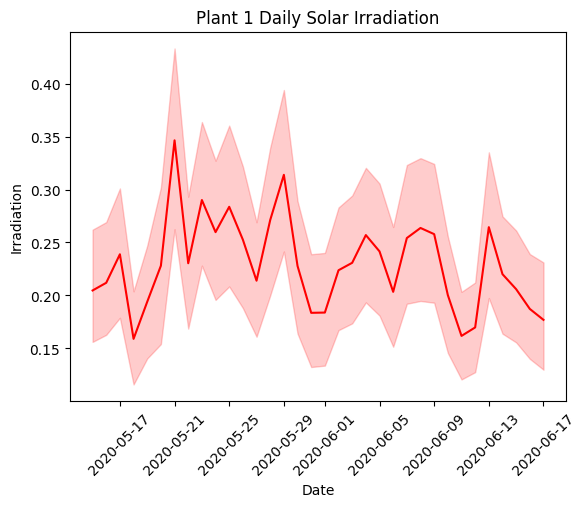

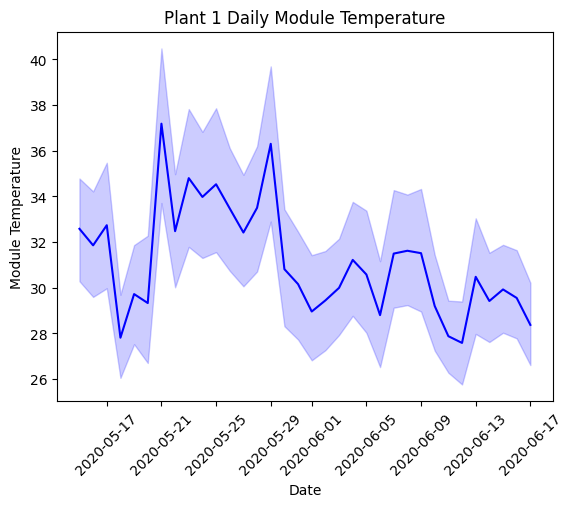

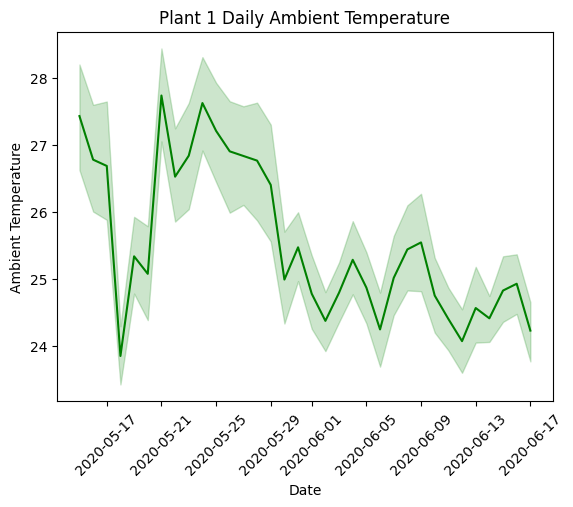

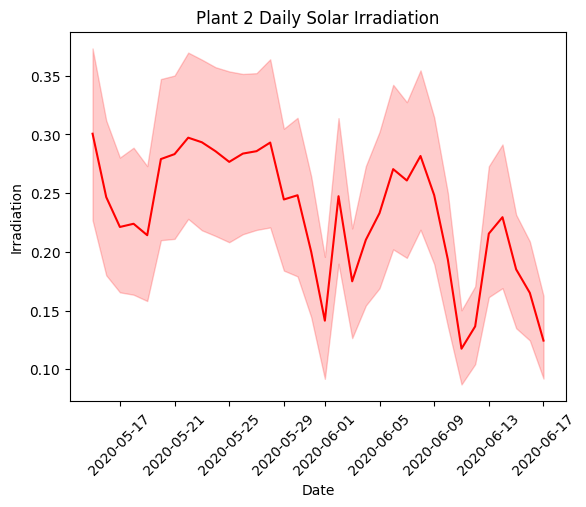

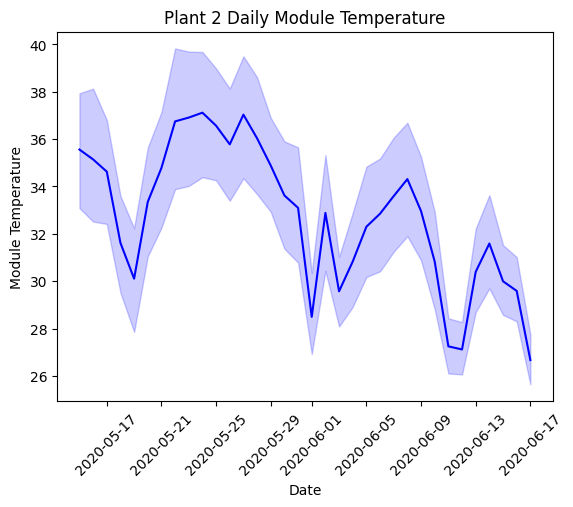

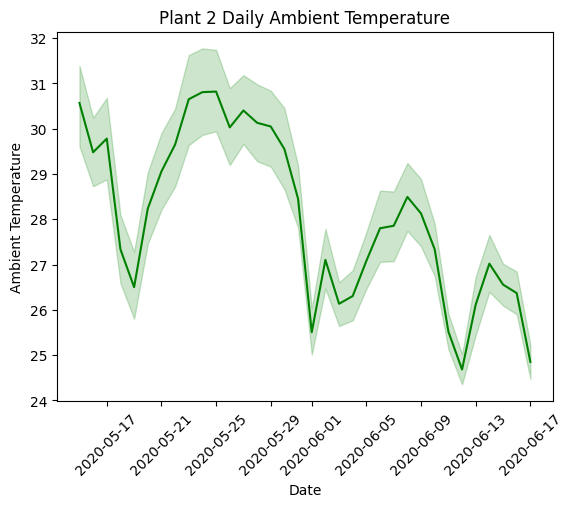

In [ ]:
#Plant 1
#Irradiation
sbn.lineplot(x='DATE', y='IRRADIATION', data=plant1_sensdaily, err_style='band', color='red')

plt.ylabel('Irradiation')
plt.xlabel('Date')
plt.title('Plant 1 Daily Solar Irradiation')
plt.xticks(rotation=45)
plt.show()

#Module Temperature
sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant1_sensdaily, err_style='band', color='blue')

plt.ylabel('Module Temperature')
plt.xlabel('Date')
plt.title('Plant 1 Daily Module Temperature')
plt.xticks(rotation=45)
plt.show()

#Ambient Temperature
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant1_sensdaily, err_style='band', color='green')

plt.ylabel('Ambient Temperature')
plt.xlabel('Date')
plt.title('Plant 1 Daily Ambient Temperature')
plt.xticks(rotation=45)
plt.show()

#Plant 2
#Irradiation
sbn.lineplot(x='DATE', y='IRRADIATION', data=plant2_sensdaily, err_style='band', color='red')

plt.ylabel('Irradiation')
plt.xlabel('Date')
plt.title('Plant 2 Daily Solar Irradiation')
plt.xticks(rotation=45)
plt.show()

#Module Temperature
sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant2_sensdaily, err_style='band', color='blue')

plt.ylabel('Module Temperature')
plt.xlabel('Date')
plt.title('Plant 2 Daily Module Temperature')
plt.xticks(rotation=45)
plt.show()

#Ambient Temperature
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant2_sensdaily, err_style='band', color='green')

plt.ylabel('Ambient Temperature')
plt.xlabel('Date')
plt.title('Plant 2 Daily Ambient Temperature')
plt.xticks(rotation=45)
plt.show()

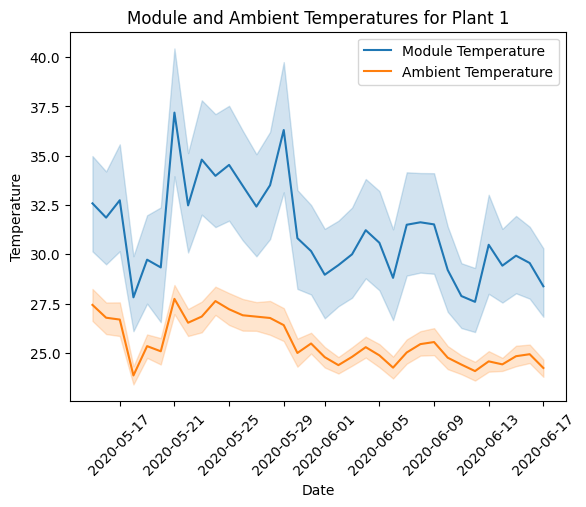

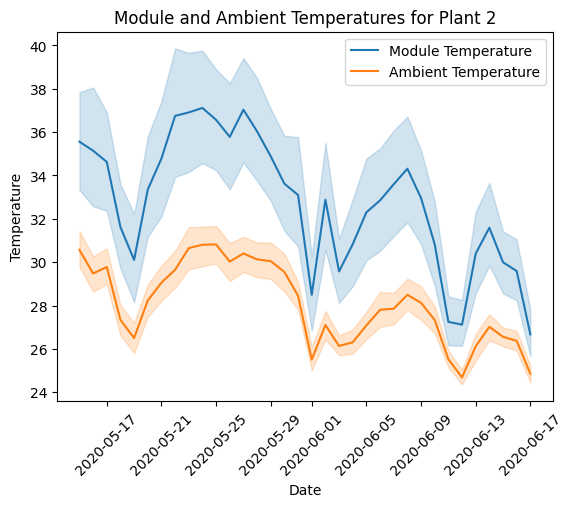

In [ ]:
# Plant 1 temperature sensors
tempsens_plant1 = sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Module Temperature')
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Ambient Temperature', ax=tempsens_plant1)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title('Module and Ambient Temperatures for Plant 1')
plt.xticks(rotation=45)
plt.show()

# Plant 2 temperature sensors
tempsens_plant2 = sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Module Temperature')
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Ambient Temperature', ax=tempsens_plant2)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title('Module and Ambient Temperatures for Plant 2')
plt.xticks(rotation=45)
plt.show()



*   Module Temperature is always higher than Ambient Temperature



Comparing Both Plants

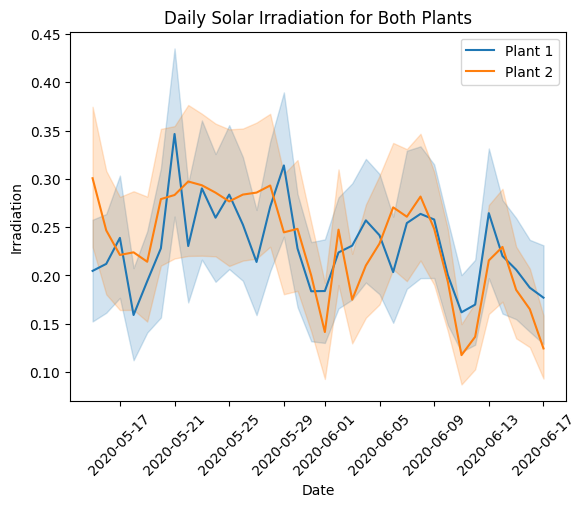

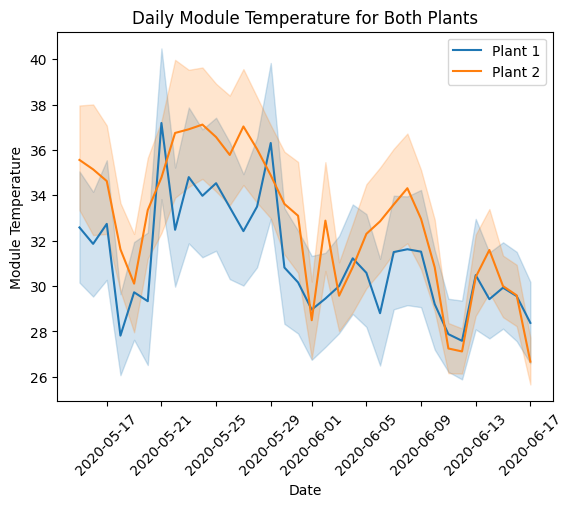

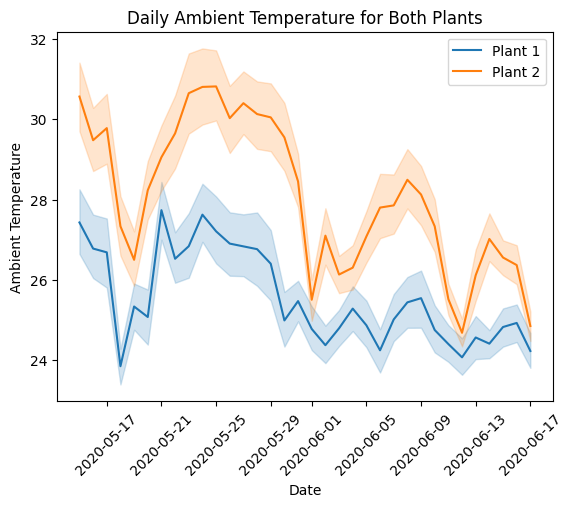

In [ ]:
# Daily Irradiation
ambient_compare = sbn.lineplot(x='DATE', y='IRRADIATION', data=plant1_sensdaily, err_style='band', label='Plant 1')
sbn.lineplot(x='DATE', y='IRRADIATION', data=plant2_sensdaily, err_style='band', label='Plant 2', ax=ambient_compare)
plt.ylabel('Irradiation')
plt.xlabel('Date')
plt.title('Daily Solar Irradiation for Both Plants')
plt.xticks(rotation=45)
plt.show()

# Daily Module Temperature
modtemp_compare = sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Plant 1')
sbn.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Plant 2', ax=modtemp_compare)
plt.ylabel('Module Temperature')
plt.xlabel('Date')
plt.title('Daily Module Temperature for Both Plants')
plt.xticks(rotation=45)
plt.show()

# Daily Ambient Temperature
ambtemp_compare = sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant1_sensdaily, err_style='band', label='Plant 1')
sbn.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant2_sensdaily, err_style='band', label='Plant 2', ax=ambtemp_compare)
plt.ylabel('Ambient Temperature')
plt.xlabel('Date')
plt.title('Daily Ambient Temperature for Both Plants')
plt.xticks(rotation=45)
plt.show()



*  The mean solar irradiation values for both plants are similar.
*  The mean module temperature of Plant 1 is slightly lower than Plant 2 most of the time.
*  The mean ambient temperature of Plant 1 is noticeably lower than Plant 2.
*  Plant 1 is located at a colder region in India as compared to Plant 2. One of the plausible explanations for similar solar irradiation is that Plant 1 is located at a higher location as compared to Plant 2.



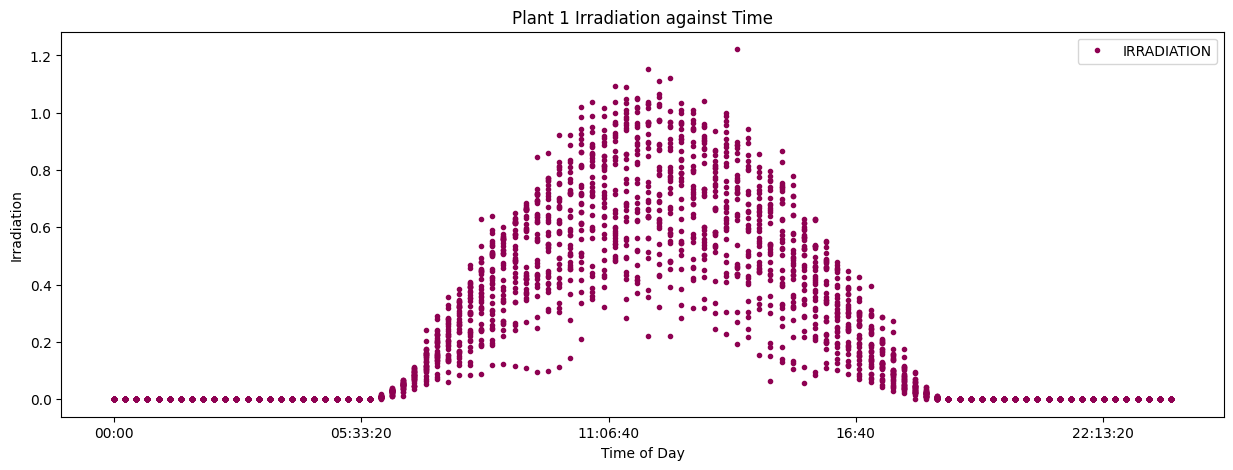

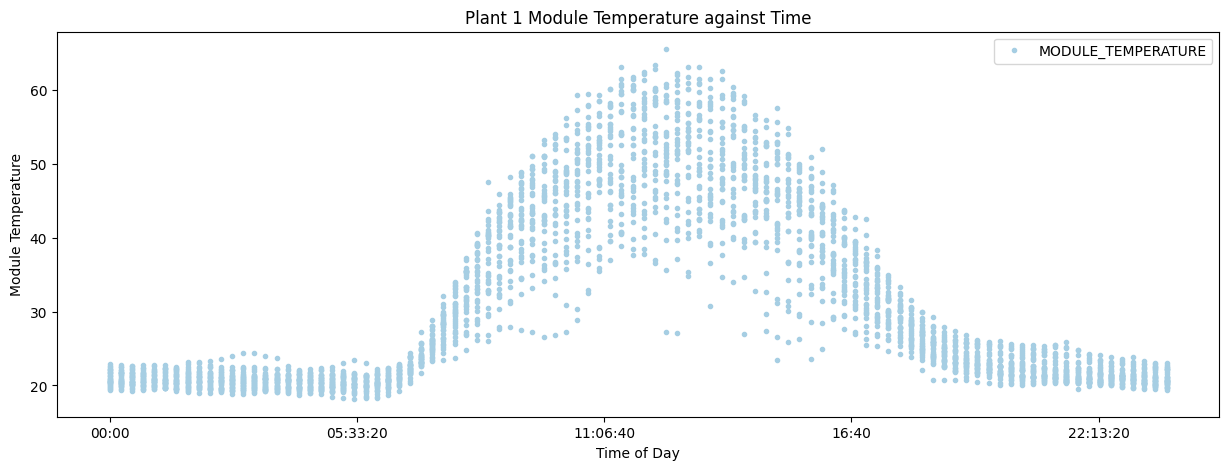

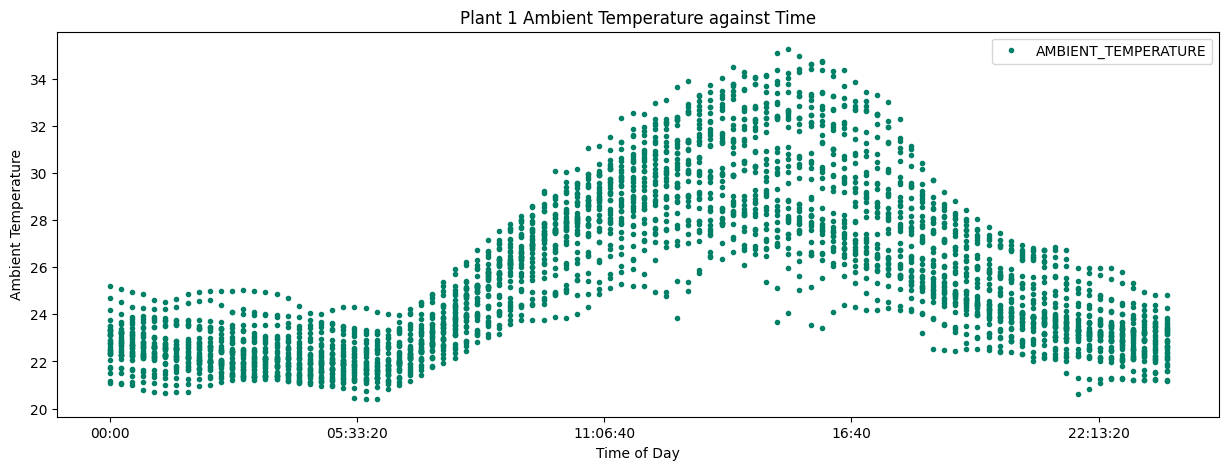

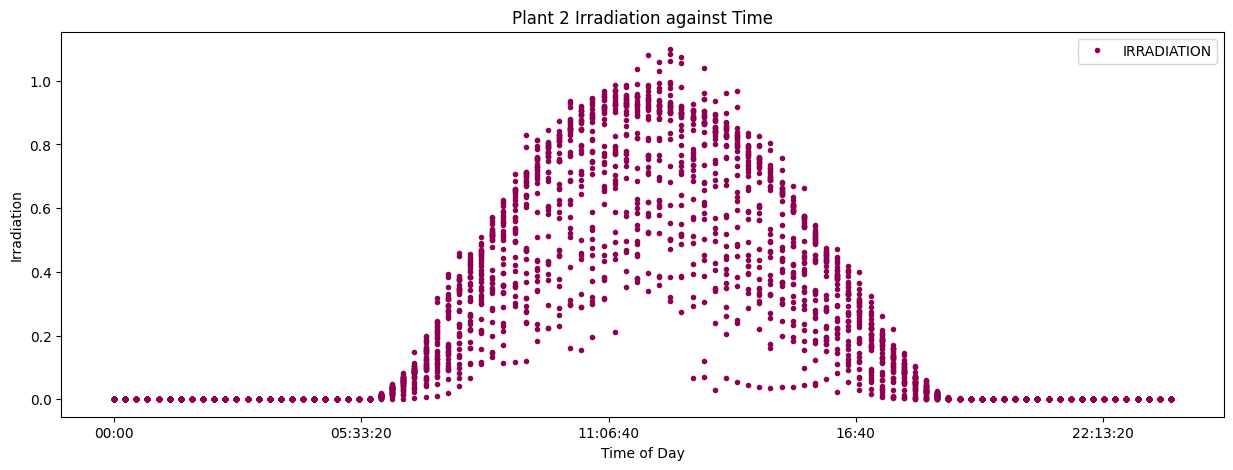

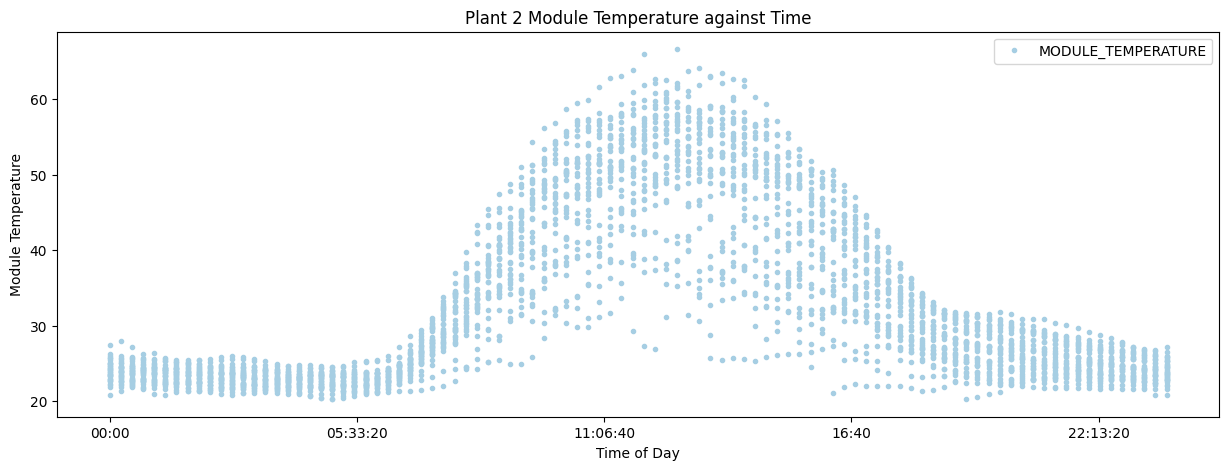

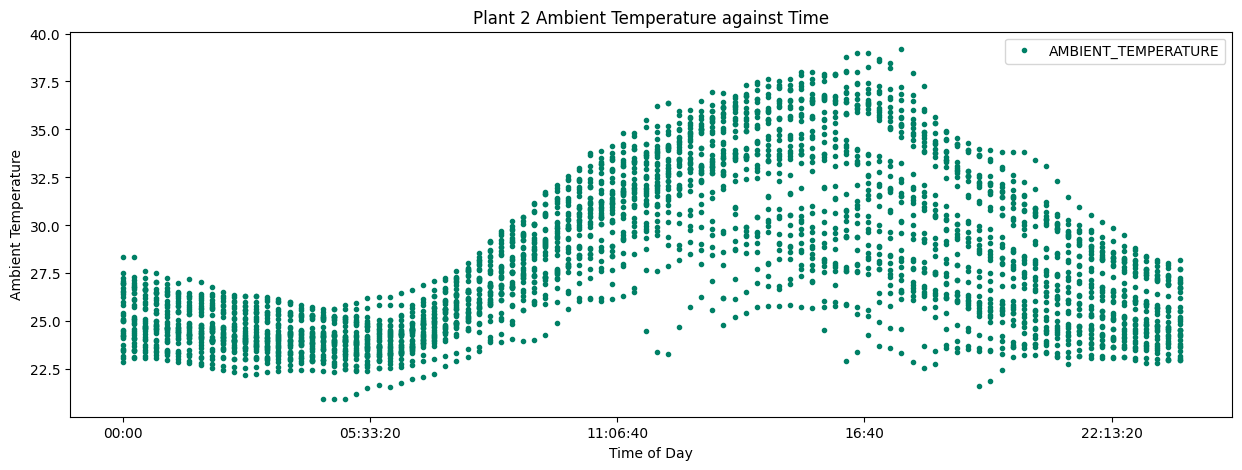

In [ ]:
# Plant 1
# Irradiation
plant1_sensdaily.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 5), colormap='PiYG')
plt.ylabel('Irradiation')
plt.xlabel('Time of Day')
plt.title('Plant 1 Irradiation against Time')
plt.show()

# Module Temperature
plant1_sensdaily.plot(x= 'TIME', y='MODULE_TEMPERATURE', style='.', figsize = (15, 5), colormap='Paired')
plt.ylabel('Module Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 1 Module Temperature against Time')
plt.show()

# Ambient Temperature
plant1_sensdaily.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', style='.', figsize = (15, 5), colormap='summer')
plt.ylabel('Ambient Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 1 Ambient Temperature against Time')
plt.show()

# Plant 2
# Irradiation
plant2_sensdaily.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 5), colormap='PiYG')
plt.ylabel('Irradiation')
plt.xlabel('Time of Day')
plt.title('Plant 2 Irradiation against Time')
plt.show()

# Module Temperature
plant2_sensdaily.plot(x= 'TIME', y='MODULE_TEMPERATURE', style='.', figsize = (15, 5), colormap='Paired')
plt.ylabel('Module Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 2 Module Temperature against Time')
plt.show()

# Ambient Temperature
plant2_sensdaily.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', style='.', figsize = (15, 5), colormap='summer')
plt.ylabel('Ambient Temperature')
plt.xlabel('Time of Day')
plt.title('Plant 2 Ambient Temperature against Time')
plt.show()



*   Ambient temperature goes down much later in the evening as compared to module temperature. This could mean that the specific heat capacity of the module is much lower than the specific heat capacity of the surrounding atmosphere.



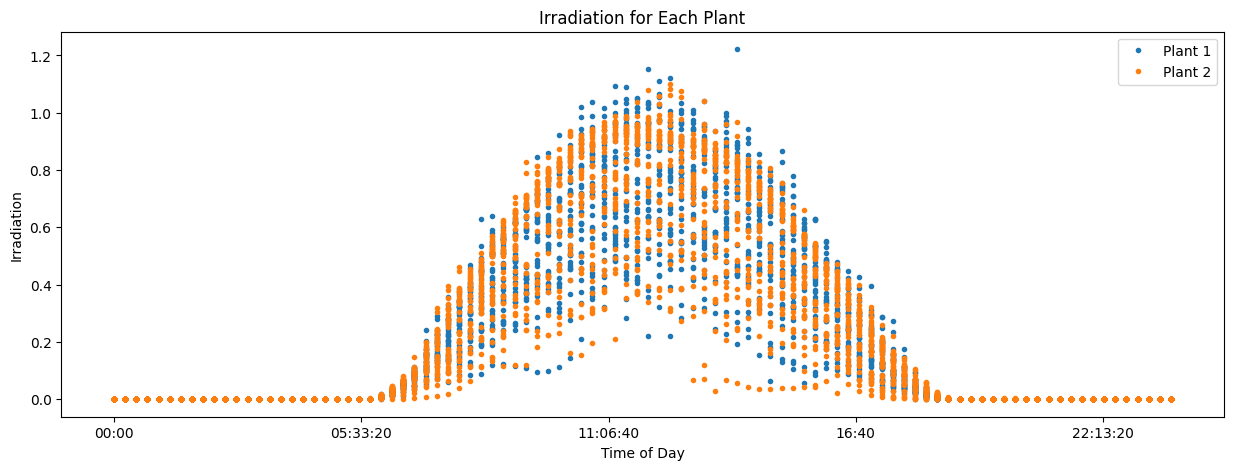

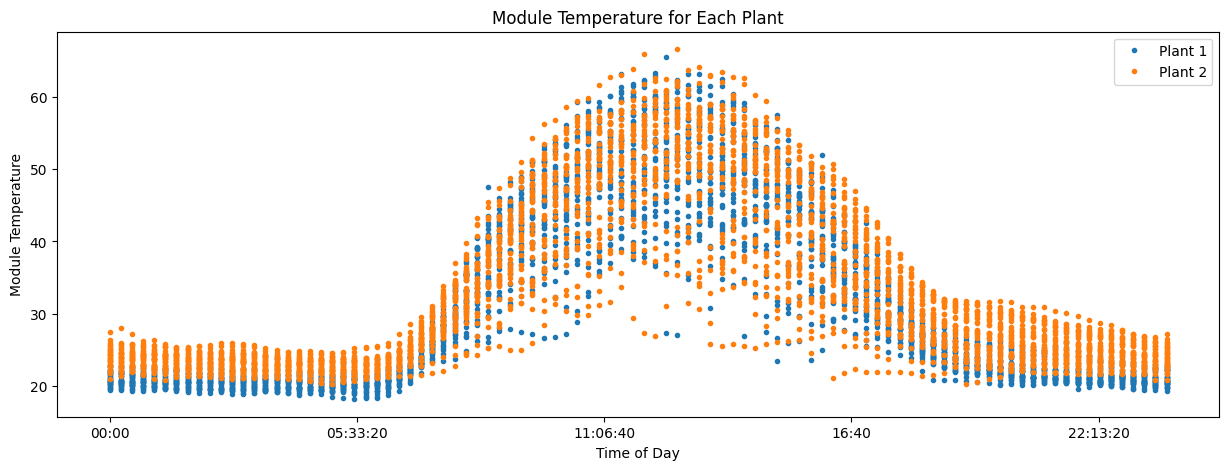

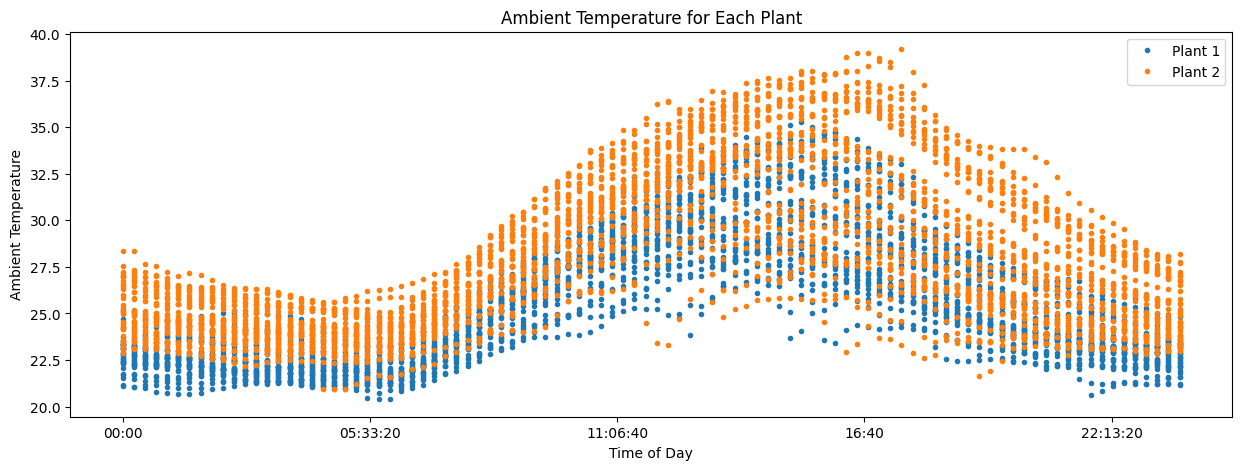

In [ ]:
# Hourly sens for each plant

# Irradiation
irr_hour = plant1_sensdaily.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 5),
                                legend=True, label='Plant 1')
plant2_sensdaily.plot(x='TIME', y='IRRADIATION', style='.', label='Plant 2', ax=irr_hour)
plt.ylabel('Irradiation')
plt.xlabel('Time of Day')
plt.title('Irradiation for Each Plant')
plt.show()

# Module temperature
modtemp_hour = plant1_sensdaily.plot(x= 'TIME', y='MODULE_TEMPERATURE', style='.', figsize = (15, 5),
                                legend=True, label='Plant 1')
plant2_sensdaily.plot(x='TIME', y='MODULE_TEMPERATURE', style='.', label='Plant 2', ax=modtemp_hour)
plt.ylabel('Module Temperature')
plt.xlabel('Time of Day')
plt.title('Module Temperature for Each Plant')
plt.show()

# Ambient temperature
ambtemp_hour = plant1_sensdaily.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', style='.', figsize = (15, 5),
                                legend=True, label='Plant 1')
plant2_sensdaily.plot(x='TIME', y='AMBIENT_TEMPERATURE', style='.', label='Plant 2', ax=ambtemp_hour)
plt.ylabel('Ambient Temperature')
plt.xlabel('Time of Day')
plt.title('Ambient Temperature for Each Plant')
plt.show()



*  Plant 2 has more extreme values in irradiation.
*  Plant 2 has higher ambient temperature values.



**Merge Sensor Data and Generation Data**

In [ ]:
mergedata1 = plant1_sensdaily.merge(plant1_gendaily, left_on='DATE_TIME', right_on='DATE_TIME')
mergedata1.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TIME_x,DATE_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,TIME_y,DATE_y
0,2020-05-15 00:00:00,25.184316,22.857507,0.0,00:00:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:00:00,2020-05-15
1,2020-05-15 00:15:00,25.084589,22.761668,0.0,00:15:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:15:00,2020-05-15
2,2020-05-15 00:30:00,24.935753,22.592306,0.0,00:30:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:30:00,2020-05-15
3,2020-05-15 00:45:00,24.846130,22.360852,0.0,00:45:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:45:00,2020-05-15
4,2020-05-15 01:00:00,24.621525,22.165423,0.0,01:00:00,2020-05-15,0.0,0.0,0.0,150761642.0,01:00:00,2020-05-15


In [ ]:
mergedata2 = plant2_sensdaily.merge(plant1_gendaily, left_on='DATE_TIME', right_on='DATE_TIME')
mergedata2.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TIME_x,DATE_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,TIME_y,DATE_y
0,2020-05-15 00:00:00,27.004764,25.060789,0.0,00:00:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:00:00,2020-05-15
1,2020-05-15 00:15:00,26.880811,24.421869,0.0,00:15:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:15:00,2020-05-15
2,2020-05-15 00:30:00,26.682055,24.427290,0.0,00:30:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:30:00,2020-05-15
3,2020-05-15 00:45:00,26.500589,24.420678,0.0,00:45:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:45:00,2020-05-15
4,2020-05-15 01:00:00,26.596148,25.088210,0.0,01:00:00,2020-05-15,0.0,0.0,0.0,150761642.0,01:00:00,2020-05-15


In [ ]:
# Remove unneeded columns

mergedata1.drop(columns =['TIME_x', 'DATE_x', 'TIME_y', 'DATE_y'], inplace=True)
mergedata2.drop(columns =['TIME_x', 'DATE_x', 'TIME_y', 'DATE_y'], inplace=True)

In [ ]:
mergedata1.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,25.184316,22.857507,0.0,0.0,0.0,0.0,143581676.0
1,2020-05-15 00:15:00,25.084589,22.761668,0.0,0.0,0.0,0.0,143581676.0
2,2020-05-15 00:30:00,24.935753,22.592306,0.0,0.0,0.0,0.0,143581676.0
3,2020-05-15 00:45:00,24.846130,22.360852,0.0,0.0,0.0,0.0,143581676.0
4,2020-05-15 01:00:00,24.621525,22.165423,0.0,0.0,0.0,0.0,150761642.0


In [ ]:
mergedata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3157 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  3157 non-null   float64       
 2   MODULE_TEMPERATURE   3157 non-null   float64       
 3   IRRADIATION          3157 non-null   float64       
 4   DC_POWER             3157 non-null   float64       
 5   AC_POWER             3157 non-null   float64       
 6   DAILY_YIELD          3157 non-null   float64       
 7   TOTAL_YIELD          3157 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 197.4 KB


Correlation For Merged Data

In [ ]:
mergecorr1 = mergedata1.corr()
mergecorr2 = mergedata2.corr()


print('Plant 1 Generation and Sensor Data Correlation Coefficient')
print(mergecorr1)
print('')

print('Plant 2 Generation and Sensor Data Correlation Coefficient')
print(mergecorr2)

Plant 1 Generation and Sensor Data Correlation Coefficient
                     DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
DATE_TIME             1.000000            -0.215680           -0.093266   
AMBIENT_TEMPERATURE  -0.215680             1.000000            0.853162   
MODULE_TEMPERATURE   -0.093266             0.853162            1.000000   
IRRADIATION          -0.032842             0.721839            0.961422   
DC_POWER             -0.025361             0.725679            0.960939   
AC_POWER             -0.025288             0.725879            0.961011   
DAILY_YIELD           0.028455             0.498010            0.212765   
TOTAL_YIELD           0.235218            -0.039269            0.069338   

                     IRRADIATION  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  
DATE_TIME              -0.032842 -0.025361 -0.025288     0.028455     0.235218  
AMBIENT_TEMPERATURE     0.721839  0.725679  0.725879     0.498010    -0.039269  
MODULE_TEMPERATURE    

In [ ]:
# Plant 1
c1 = mergecorr1.unstack()
sort1 = c1.sort_values(kind="quicksort")
print('Plant 1 Top Correlations:')
print(sort1[22:42])
print('')

# Plant 2
c2 = mergecorr2.unstack()
sort2 = c2.sort_values(kind="quicksort")
print('Plant 2 Top Correlations:')
print(sort2[22:42])

Plant 1 Top Correlations:
DAILY_YIELD          DC_POWER               0.092450
DC_POWER             DAILY_YIELD            0.092450
IRRADIATION          TOTAL_YIELD            0.102223
TOTAL_YIELD          IRRADIATION            0.102223
DC_POWER             TOTAL_YIELD            0.106301
TOTAL_YIELD          DC_POWER               0.106301
                     AC_POWER               0.106401
AC_POWER             TOTAL_YIELD            0.106401
DAILY_YIELD          MODULE_TEMPERATURE     0.212765
MODULE_TEMPERATURE   DAILY_YIELD            0.212765
DATE_TIME            TOTAL_YIELD            0.235218
TOTAL_YIELD          DATE_TIME              0.235218
DAILY_YIELD          AMBIENT_TEMPERATURE    0.498010
AMBIENT_TEMPERATURE  DAILY_YIELD            0.498010
IRRADIATION          AMBIENT_TEMPERATURE    0.721839
AMBIENT_TEMPERATURE  IRRADIATION            0.721839
                     DC_POWER               0.725679
DC_POWER             AMBIENT_TEMPERATURE    0.725679
AC_POWER            

Ignoring the obvious correlation between AC_POWER and DC_POWER, these are the top correlations with AC_POWER/DC_POWER:

FACTOR (AC1, DC1, AC2, DC2)



1.  IRRADIATION (0.996664, 0.996746, 0.924785, 0.924574)
2. MODULE_TEMPERATURE (0.959787, 0.959706, 0.877665, 0.877453)
3. AMBIENT_TEMPERATURE (0.703721, 0.703512, 0.590186, 0.589997)



*   Plant 2 has a non-trivial lower temperature correlation coefficient than Plant 1.





**Training and Prediction**

Splitting data and fitting into model

PLANT 1

In [ ]:
mergedata1.columns

Index(['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

In [ ]:
X = mergedata1[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']] # Features
y = mergedata1['AC_POWER'] # Target

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=51) # Splits train and test sets

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

In [ ]:
# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [ ]:
# Print results
print("Linear Regression - MSE: {}, MAE: {}, R2: {}".format(lr_mse, lr_mae, lr_r2))
print("XGBoost - MSE: {}, MAE: {}, R2: {}".format(xgb_mse, xgb_mae, xgb_r2))
print("Decision Tree - MSE: {}, MAE: {}, R2: {}".format(dt_mse, dt_mae, dt_r2))
print("Random Forest - MSE: {}, MAE: {}, R2: {}".format(rf_mse, rf_mae, rf_r2))

Linear Regression - MSE: 683408.9172092447, MAE: 449.49416829979947, R2: 0.9909184227694766
XGBoost - MSE: 495075.9592618305, MAE: 338.50230562106685, R2: 0.9934211122421818
Decision Tree - MSE: 595640.5225945836, MAE: 374.391639156711, R2: 0.9920847456458989
Random Forest - MSE: 443230.79869802546, MAE: 313.2164537100476, R2: 0.9941100640802873


HyperParamter Tunning

In [ ]:

from sklearn.model_selection import GridSearchCV

# Define the Random Forest regressor
rf = RandomForestRegressor()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [None, 10, 20, 30],
    'random_state': [42]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

rf_best = RandomForestRegressor(**best_params)
rf_best.fit(X_train, y_train)

# Make predictions with the best model
predictions = rf_best.predict(X_test)

# Calculate MSE, MAE, and R2
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the results
print("Hyperparameter-Tuned Random Forest Regressor - MSE: {}, MAE: {}, R2: {}".format(mse, mae, r2))

Streaming output truncated to the last 5000 lines.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 106, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: continuous is not supported

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details

Hyperparameter-Tuned Random Forest Regressor - MSE: 420676.9321080339, MAE: 304.7680545371633, R2: 0.9944097743651931


PLANT 2

In [ ]:
mergedata2.columns

Index(['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

In [ ]:
X2 = mergedata2[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']] # Features
y2 = mergedata2['AC_POWER'] # Target

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3,random_state=51) # Splits train and test sets

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X2_train, y2_train)
lr_pred2 = lr.predict(X2_test)
lr_mse_2 = mean_squared_error(y2_test, lr_pred2)
lr_mae_2 = mean_absolute_error(y2_test, lr_pred2)
lr_r2_2 = r2_score(y2_test, lr_pred2)

In [ ]:
# XGBoost
xgb = XGBRegressor()
xgb.fit(X2_train, y2_train)
xgb_pred2 = xgb.predict(X2_test)
xgb_mse_2 = mean_squared_error(y2_test, xgb_pred2)
xgb_mae_2 = mean_absolute_error(y2_test, xgb_pred2)
xgb_r2_2 = r2_score(y2_test, xgb_pred2)

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X2_train, y2_train)
dt_pred2 = dt.predict(X2_test)
dt_mse_2 = mean_squared_error(y2_test, dt_pred2)
dt_mae_2 = mean_absolute_error(y2_test, dt_pred2)
dt_r2_2 = r2_score(y2_test, dt_pred2)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X2_train, y2_train)
rf_pred2 = rf.predict(X2_test)
rf_mse_2 = mean_squared_error(y2_test, rf_pred2)
rf_mae_2 = mean_absolute_error(y2_test, rf_pred2)
rf_r2_2 = r2_score(y2_test, rf_pred2)

In [ ]:
# Print results
print("Linear Regression - MSE: {}, MAE: {}, R2: {}".format(lr_mse_2, lr_mae_2, lr_r2_2))
print("XGBoost - MSE: {}, MAE: {}, R2: {}".format(xgb_mse_2, xgb_mae_2, xgb_r2_2))
print("Decision Tree - MSE: {}, MAE: {}, R2: {}".format(dt_mse_2, dt_mae_2, dt_r2_2))
print("Random Forest - MSE: {}, MAE: {}, R2: {}".format(rf_mse_2, rf_mae_2, rf_r2_2))

Linear Regression - MSE: 14112058.954657774, MAE: 2318.196980088065, R2: 0.8171422025893247
XGBoost - MSE: 13266105.502241697, MAE: 2026.1637207196059, R2: 0.8281036920160467
Decision Tree - MSE: 19889772.06697504, MAE: 2452.140256066122, R2: 0.7422771600619613
Random Forest - MSE: 11200566.01756523, MAE: 1863.9143669229138, R2: 0.8548680360317765


In [79]:
import warnings
from sklearn.exceptions import DataConversionWarning
from tqdm import tqdm

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import GridSearchCV

# Define the Random Forest regressor
rf = RandomForestRegressor()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [None, 10, 20, 30],
    'random_state': [42]
}

# Perform grid search with cross-validation
grid_search_2 = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

# tqdm setup
total_iterations = len(param_grid['n_estimators']) * len(param_grid['max_features']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * len(param_grid['max_depth'])
with tqdm(total=total_iterations, desc="Grid Search Progress") as pbar:
    grid_search_2.fit(X2_train, y2_train)
    pbar.update(1)


# Get the best hyperparameters
best_params_2 = grid_search_2.best_params_

rf_best_2 = RandomForestRegressor(**best_params_2)
rf_best_2.fit(X2_train, y2_train)

# Make predictions with the best model
predictions_2 = rf_best_2.predict(X2_test)

# Calculate MSE, MAE, and R2
mse_2 = mean_squared_error(y2_test, predictions_2)
mae_2 = mean_absolute_error(y2_test, predictions_2)
r2_2 = r2_score(y2_test, predictions_2)

# Print the results
print("Hyperparameter-Tuned Random Forest Regressor - MSE: {}, MAE: {}, R2: {}".format(mse_2, mae_2, r2_2))

Grid Search Progress:   0%|          | 1/324 [17:11<92:32:17, 1031.39s/it]


Hyperparameter-Tuned Random Forest Regressor - MSE: 11214803.175768139, MAE: 1861.2848474516065, R2: 0.8546835572538225


##KEY TAKEAWAYS



1.   Plant 1 is located at a colder region with less fluctuation in ambient temperature.
2. Plant 1 has more reliable PV modules, with 10 times more DC output than Plant 2 and higher AC output stability.
3. Plant 1 has higher correlation between output and yield, which means that Plant 1 has a higher overall system efficiency than Plant 2, despite having similar inverter efficiency.
3. Despite recording different temperature levels, both plants seem to receive similar amount of sunlight every day. However Plant 2 is slightly more erratic with more extreme values of irradiation. This could mean that Plant 2 is located at a more cloudy region as compared to Plant 1. By extension, Plant 1 could be located at an elevated location, where less clouds are present and the temperatures are lower. This could also mean that the modules in Plant 2 simply require maintenance.
4. The larger temperatures of Plant 2 mainly result from diffused sunlight, which does not have as much energy and wavelength range to excite the electrons in the PV cells.
5. For Plant 1, a unit increase in irradiation results in roughly 26500.433104kW ± 735.74kW (RMSE) increase in AC output. (Values slightly differ every run)


